## 1. Number of days until the property is available to move in.

#### Import dataset that created using `view` in SQL.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\7_UK_Housing\Manchester_Rent.csv')

sns.set_style('ticks')

# Drop unnecessary columns
df = df_original.drop('location',axis=1)
df =df.drop('property_id',axis=1)

### Create Dataframe by grouping days until available and calculate percentage.  

In [5]:
df_move_in= df.groupby(['available','till_move_in_day']).agg(
    posting_count = ('till_move_in_day','size')
)
df_move_in['percentage']= df_move_in['posting_count'].div(len(df)/100)
df_move_in

,,posting_count,percentage
available,till_move_in_day,,
01/05/2023,15,75,7.462687
01/06/2023,46,32,3.184080
01/07/2023,76,43,4.278607
01/08/2023,107,4,0.398010
01/09/2023,138,3,0.298507
...,...,...,...
30/04/2023,14,22,2.189055
30/05/2023,44,1,0.099502
30/06/2023,75,2,0.199005


### Explore most posted dates

In [6]:
df_most = df_move_in[df_move_in['percentage']>=1].sort_values(by='percentage',ascending=False)
df_most

,,posting_count,percentage
available,till_move_in_day,,
16/04/2023,0,536,53.333333
01/05/2023,15,75,7.462687
01/07/2023,76,43,4.278607
01/06/2023,46,32,3.184080
30/04/2023,14,22,2.189055
17/04/2023,1,13,1.293532
20/04/2023,4,13,1.293532
15/05/2023,29,11,1.094527


- Over 50% of posting is free to move in, followed by high demand for moving in on the first day of the month.

In [11]:
# Dictionary to display labels
day_dict = { 15 : 'May 1st', 46: 'June 1st', 76: 'July 1st'}

- Using seaborn `displot`, visualize the distribution of results and mark the first day of the month.

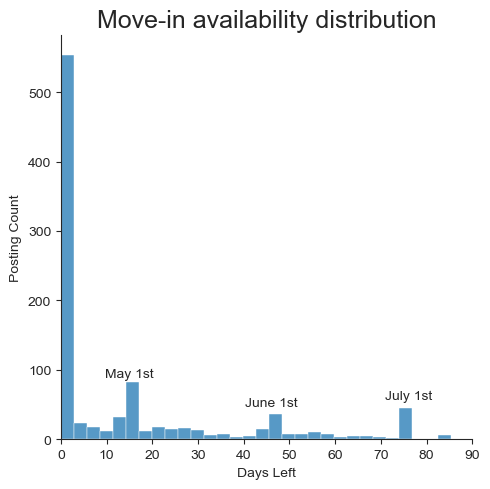

In [12]:
sns.displot(df['till_move_in_day'], bins=90)

texts = []
for i, (days, show_date) in enumerate(day_dict.items()):
    texts.append(plt.text(x=days,
            y= df_most[df_most.index.get_level_values('till_move_in_day') == days]['posting_count'].iloc[0]+20,
            s =show_date, ha='center',va='center'))

plt.title('Move-in availability distribution',fontsize=18)
plt.ylabel('Posting Count')
plt.xlabel('Days Left')
plt.xlim(0,90)
plt.tight_layout()
plt.show()


#### Insight
    - More than 50% of the listed properties are available for immediate move-in.
    - The first day of the month is the next popular demanded move-in date.
    - Additionally, many properties become available to move-in within a month.